# Analysis

## 1. Import Modules

In [8]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import seaborn as sns

path_parent = os.path.dirname(os.getcwd())

# if os.getcwd()[-8:] != 'HEALTH-ECONS':
#     os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/samaypanwar/storage/University/Y4S2/HEALTH ECONS/group_project


## 2. Dataset Information

In [9]:
df_premiums = pd.read_csv('data/main_data_file.csv')
df_premiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97134 entries, 0 to 97133
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State Code                                             97134 non-null  object 
 1   FIPS County Code                                       97134 non-null  int64  
 2   County Name                                            97134 non-null  object 
 3   Metal Level                                            97134 non-null  object 
 4   Issuer Name                                            97134 non-null  object 
 5   Premium Adult Individual Age 60                        97134 non-null  float64
 6   Medical Deductible - Individual - Standard             97134 non-null  float64
 7   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 8   Time Trend                                     

In [10]:
df_covid = pd.read_csv('data/year_and_statewise_covid_cases.csv')
df_covid = df_covid.rename(columns = {
        'state': 'State Code',
        'date_updated': 'Time Trend',
        'new_cases': 'Cases'
        })

df_covid['Time Trend'] = list(map(lambda x: x.year, pd.to_datetime(df_covid['Time Trend'])))
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  180 non-null    object
 1   Time Trend  180 non-null    int64 
 2   Cases       180 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


### 2.1 Value Counts


In [11]:
print(df_premiums['State Code'].value_counts().head(10))

TX    15013
FL    10023
MI     7595
GA     7584
SC     6274
NC     6094
IL     4131
OK     3994
MO     3906
OH     3502
Name: State Code, dtype: int64


In [12]:
print(df_premiums['County Name'].value_counts().head(10))

Marion        776
Jackson       696
Washington    671
Jefferson     670
Lincoln       621
Clay          585
Union         580
Monroe        569
Calhoun       553
Lake          524
Name: County Name, dtype: int64


In [13]:
df_premiums['Time Trend'].value_counts()

2022    20664
2021    19238
2020    17100
2017    16698
2019    11946
2018    11488
Name: Time Trend, dtype: int64

## 3. Plots for Numeric Data

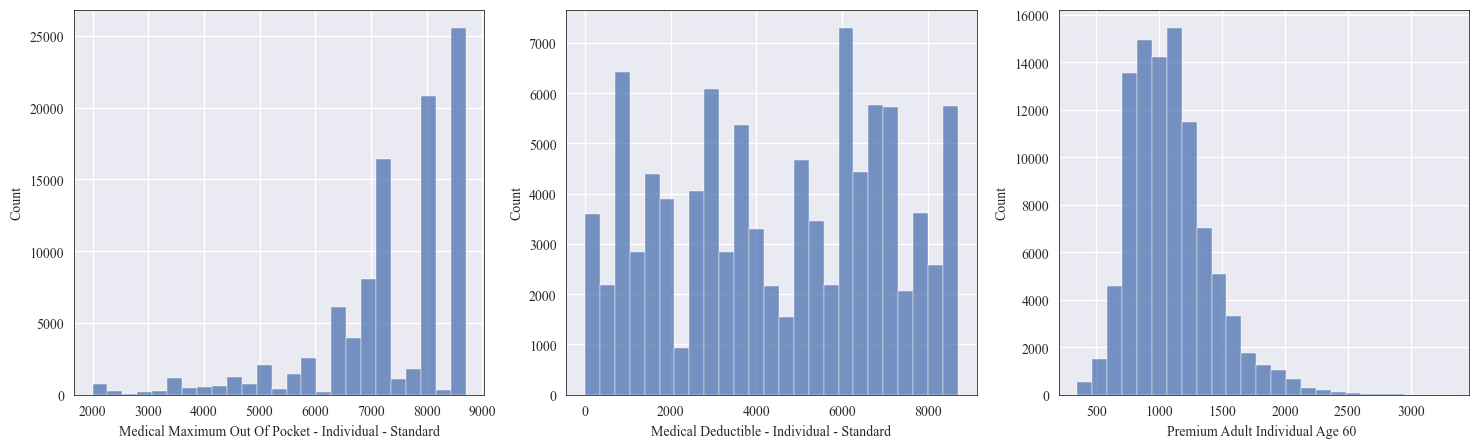

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.histplot(df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], bins = 25, ax=ax[0]);
sns.histplot(df_premiums['Medical Deductible - Individual - Standard'], bins = 25, ax=ax[1]);
sns.histplot(df_premiums['Premium Adult Individual Age 60 '], bins = 25, ax=ax[2]);

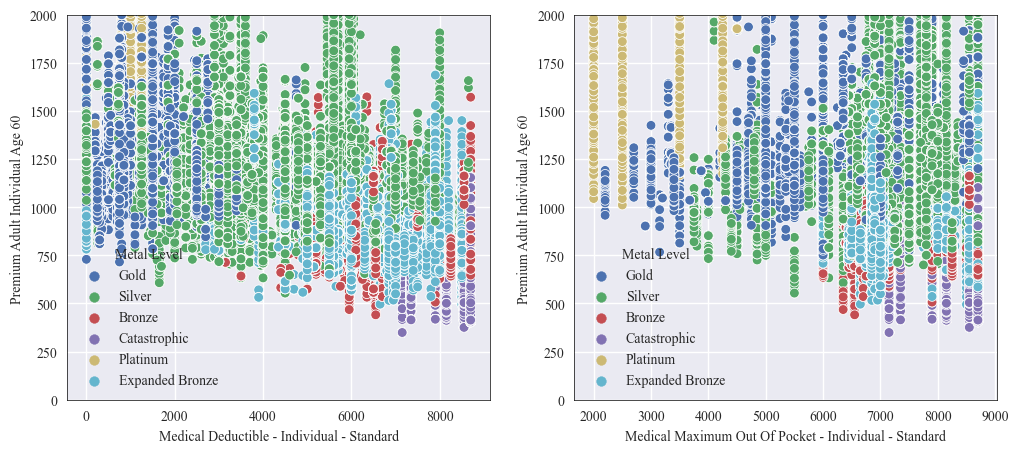

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 60 '], ax=ax[0], hue = df_premiums['Metal Level']);
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 60 '], ax=ax[1], hue = df_premiums['Metal Level']);
ax[0].set_ylim(0, 2000);
ax[1].set_ylim(0, 2000);
# sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 60 '], ax=ax[0]);


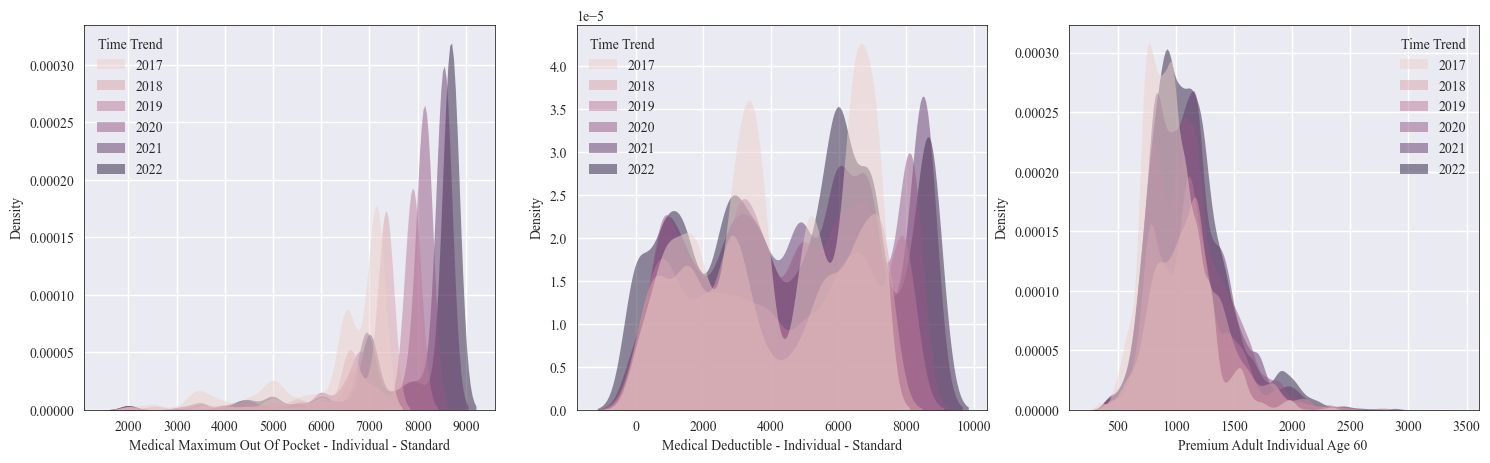

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
plot1 = sns.kdeplot(data = df_premiums, x = 'Medical Maximum Out Of Pocket - Individual - Standard', hue = 'Time Trend', ax=ax[0], fill=True,
   alpha=.5, linewidth=0);
plot2 = sns.kdeplot(data = df_premiums, x = 'Medical Deductible - Individual - Standard', hue = 'Time Trend', ax=ax[1], fill=True,
   alpha=.5, linewidth=0);
plot3 = sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 60 ', hue = 'Time Trend', ax=ax[2], fill=True,
   alpha=.5, linewidth=0);

sns.move_legend(plot1, "upper left")
sns.move_legend(plot2, "upper left")
sns.move_legend(plot3, "upper right")

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 60 '>

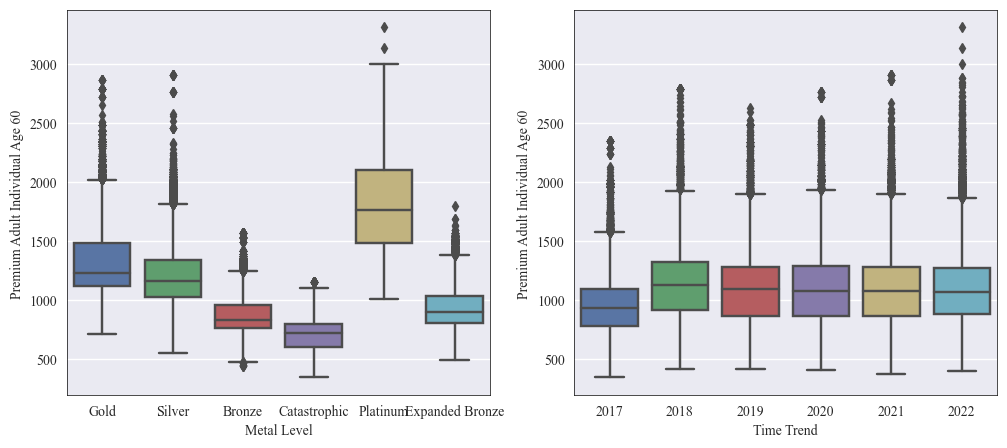

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(y = df_premiums['Premium Adult Individual Age 60 '], x = df_premiums['Metal Level'], ax=ax[0])
sns.boxplot(y = df_premiums['Premium Adult Individual Age 60 '], x = df_premiums['Time Trend'], ax=ax[1])

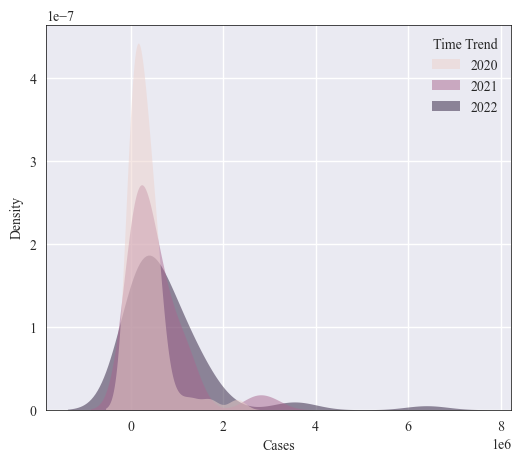

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

sns.kdeplot(x = df_covid['Cases'], fill=True,
   alpha=.5, linewidth=0, hue = df_covid['Time Trend']);

Model:

premium = max_oop + deductible + state_dummies + covid + state_dummies x covid + state_dummies x covid + covid_cases_in_state x state_dummies x covid + metal_level


## 4. KS Normality Test

In [19]:
from scipy.stats import kstest
import scipy
def multivariate_ks(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = kstest(rvs = series[col], cdf = scipy.stats.norm.cdf)
        statistic.append(result.statistic)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)


In [20]:
numeric_variables = [
        'Premium Adult Individual Age 60 ',
        'Medical Deductible - Individual - Standard',
        'Medical Maximum Out Of Pocket - Individual - Standard',
        ]
print(multivariate_ks(df_premiums[numeric_variables]))

                                                    statistic  pvalue
Premium Adult Individual Age 60                      1.000000     0.0
Medical Deductible - Individual - Standard           0.968384     0.0
Medical Maximum Out Of Pocket - Individual - St...   1.000000     0.0


## 5. Create Dummies

In [21]:

df_political = pd.read_csv('data/cleaned_political_data.csv')
df_political

,State Code,Time Trend,Unity
0,AL,2017,Rep
1,AK,2017,Divided
2,AZ,2017,Rep
3,AR,2017,Rep
4,CA,2017,Dem
...,...,...,...
345,VA,2023,Divided
346,WA,2023,Dem
347,WV,2023,Rep
348,WI,2023,Divided


In [22]:
import statsmodels.api as sm

state_dummies = pd.get_dummies(df_premiums['State Code'])
plan_type = pd.get_dummies(df_premiums['Metal Level'])

df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])
df_regression.Cases = df_regression.Cases.fillna(0) / 1_000
# df_regression.info()

cols_to_drop = [
        'State Code',
        'FIPS County Code',
        'County Name',
        'Metal Level',
        'Issuer Name',
        'Time Trend',
        'Unity'
        ]

year_dummy = pd.get_dummies(df_regression['Time Trend'])
political_dummies = pd.get_dummies(df_regression['Unity'])
df_regression.drop(cols_to_drop, axis=1, inplace = True)
df_regression = pd.concat([df_regression, state_dummies, plan_type, year_dummy, political_dummies], axis=1)

dummies_to_drop = [
        'Catastrophic', # Base Metal Plan
        'NH', # Base State
        2017, # Base Year
        "Divided" # Base Political Status
        ]

df_regression.drop(dummies_to_drop, axis=1, inplace = True)

# df_regression.info()

In [23]:
df_regression.tail()

,Premium Adult Individual Age 60,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,Cases,AK,AL,AR,AZ,DE,FL,...,Gold,Platinum,Silver,2018,2019,2020,2021,2022,Dem,Rep
97129,1382.43,2000.0,8550.0,67.605,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
97130,1355.92,1500.0,7000.0,67.605,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
97131,1090.01,8550.0,8550.0,67.605,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
97132,1637.50,6000.0,8550.0,67.605,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
97133,1657.70,2500.0,8550.0,67.605,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [24]:
import logging

#now we will Create and configure logger
logging.basicConfig(filename="log.log",
					format='%(message)s',
					filemode='w')

#Let us Create an object
logger=logging.getLogger()

#Now we are going to Set the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)


In [25]:
# dependent_variable = 'Premium Adult Individual Age 60 '
# independent_variables = df_regression.columns.difference([dependent_variable])
# Y = df_regression[dependent_variable]
# X = df_regression[independent_variables]
#
# mod = sm.OLS(Y, X)
# res = mod.fit(cov_type = "HC0", use_t = True)
# !echo "" > log.log
# logger.info(res.summary())

In [26]:
df_regression.head()

,Premium Adult Individual Age 60,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,Cases,AK,AL,AR,AZ,DE,FL,...,Gold,Platinum,Silver,2018,2019,2020,2021,2022,Dem,Rep
0,2351.0,1500.0,5000.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2018.0,3000.0,7150.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1573.0,6350.0,7150.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1570.0,5250.0,6500.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1962.0,3000.0,4100.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 60 '
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist() + plan_type.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
res.summary()
# !echo "" > log.log
# logger.warning("BASE MODEL")
# logger.debug("----------------------------------------------------------------")
# logger.info(res.summary())
# logger.info("\n \n")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Premium Adult Individual Age 60    R-squared:                       0.333
Model:                                          OLS   Adj. R-squared:                  0.333
Method:                               Least Squares   F-statistic:                     9391.
Date:                              Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                      14:50:21   Log-Likelihood:            -6.7897e+05
No. Observations:                             97134   AIC:                         1.358e+06
Df Residuals:                                 97128   BIC:                         1.358e+06
Df Model:                                         5                                         
Covariance Type:                                HC0                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                  1546.4585      6.403    241.528      0.000    1533.909    1559.008
Cases                                                     0.0318      0.001     29.641      0.000       0.030       0.034
Dem                                                     -47.7259      3.306    -14.435      0.000     -54.206     -41.246
Medical Deductible - Individual - Standard               -0.0694      0.000   -204.179      0.000      -0.070      -0.069
Medical Maximum Out Of Pocket - Individual - Standard    -0.0171      0.001    -19.173      0.000      -0.019      -0.015
Rep                                                     -51.6001      2.047    -25.208      0.000     -55.612     -47.588
==============================================================================
Omnibus:                    18446.835   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36854.650
Skew:                           1.148   Prob(JB):                         0.00
Kurtosis:                       4.959   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Simple OLS with no time/state type correction
dependent_variable = 'Premium Adult Individual Age 60 '
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
res.summary()
# logger.warning("BASE MODEL | PLAN FIXED EFFECTS")
# logger.debug("----------------------------------------------------------------")
# logger.info(res.summary())
# logger.info("\n \n")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Premium Adult Individual Age 60    R-squared:                       0.463
Model:                                          OLS   Adj. R-squared:                  0.463
Method:                               Least Squares   F-statistic:                     8994.
Date:                              Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                      14:50:21   Log-Likelihood:            -6.6843e+05
No. Observations:                             97134   AIC:                         1.337e+06
Df Residuals:                                 97123   BIC:                         1.337e+06
Df Model:                                        10                                         
Covariance Type:                                HC0                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   729.3560      7.689     94.855      0.000     714.285     744.427
Bronze                                                  145.0870      2.365     61.360      0.000     140.452     149.721
Cases                                                     0.0081      0.001      8.614      0.000       0.006       0.010
Dem                                                     -33.7033      3.271    -10.305      0.000     -40.114     -27.293
Expanded Bronze                                         195.5912      2.511     77.881      0.000     190.669     200.514
Gold                                                    537.3063      4.468    120.264      0.000     528.550     546.063
Medical Deductible - Individual - Standard               -0.0154      0.000    -32.706      0.000      -0.016      -0.015
Medical Maximum Out Of Pocket - Individual - Standard     0.0161      0.001     20.001      0.000       0.015       0.018
Platinum                                               1064.2058     11.451     92.934      0.000    1041.762    1086.650
Rep                                                     -36.1838      1.859    -19.467      0.000     -39.827     -32.541
Silver                                                  434.3442      3.107    139.782      0.000     428.254     440.434
==============================================================================
Omnibus:                    17609.461   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38887.405
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       5.270   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Simple OLS with no time type correction
dependent_variable = 'Premium Adult Individual Age 60 '
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
res.summary()
# logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS")
# logger.debug("----------------------------------------------------------------")
# logger.info(res.summary())
# logger.info("\n \n")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Premium Adult Individual Age 60    R-squared:                       0.660
Model:                                          OLS   Adj. R-squared:                  0.660
Method:                               Least Squares   F-statistic:                     4484.
Date:                              Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                      14:50:21   Log-Likelihood:            -6.4628e+05
No. Observations:                             97134   AIC:                         1.293e+06
Df Residuals:                                 97090   BIC:                         1.293e+06
Df Model:                                        43                                         
Covariance Type:                                HC0                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   482.3060      8.836     54.582      0.000     464.987     499.625
AK                                                      636.3206      8.615     73.866      0.000     619.436     653.205
AL                                                      316.3330      5.075     62.328      0.000     306.385     326.281
AR                                                      137.5971      5.114     26.908      0.000     127.574     147.620
AZ                                                      459.6813      9.978     46.069      0.000     440.124     479.238
Bronze                                                  131.4488      2.136     61.534      0.000     127.262     135.636
Cases                                                     0.0104      0.001     11.140      0.000       0.009       0.012
DE                                                      115.9268     10.974     10.564      0.000      94.418     137.436
Dem                                                      68.3560      3.953     17.291      0.000      60.608      76.104
Expanded Bronze                                         151.7641      2.320     65.422      0.000     147.217     156.311
FL                                                      491.7705      5.733     85.783      0.000     480.534     503.007
GA                                                      385.3387      5.696     67.654      0.000     374.175     396.502
Gold                                                    506.5988      4.041    125.362      0.000     498.678     514.519
IL                                                      322.0649      5.928     54.333      0.000     310.447     333.683
IN                                                      175.5043     10.166     17.264      0.000     155.579     195.430
KS                                                      229.0494      5.292     43.281      0.000     218.677     239.422
KY                                                      315.5646      6.175     51.105      0.000     303.462     327.667
LA                                                      902.0726      7.544    119.580      0.000     887.287     916.858
ME                                                      141.7414     10.795     13.130      0.000     120.583     162.900
MI                                                      199.4857      5.129     38.891      0.000     189.432     209.539
MO                                                      591.5881      5.556    106.484      0.000     580.699     602.477
M

In [30]:
# Simple OLS with time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 60 '
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]

X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
res.summary()
# logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS")
# logger.debug("----------------------------------------------------------------")
# logger.info(res.summary())
# logger.info("\n \n")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Premium Adult Individual Age 60    R-squared:                       0.691
Model:                                          OLS   Adj. R-squared:                  0.690
Method:                               Least Squares   F-statistic:                     4509.
Date:                              Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                      14:50:22   Log-Likelihood:            -6.4170e+05
No. Observations:                             97134   AIC:                         1.284e+06
Df Residuals:                                 97085   BIC:                         1.284e+06
Df Model:                                        48                                         
Covariance Type:                                HC0                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   479.5379      8.583     55.872      0.000     462.716     496.360
2018                                                    193.0692      2.281     84.637      0.000     188.598     197.540
2019                                                    178.1930      2.384     74.741      0.000     173.520     182.866
2020                                                    160.7249      2.512     63.986      0.000     155.802     165.648
2021                                                    161.8150      2.852     56.741      0.000     156.225     167.405
2022                                                    160.7022      3.201     50.199      0.000     154.428     166.977
AK                                                      629.4308      9.839     63.972      0.000     610.146     648.715
AL                                                      316.6006      5.183     61.083      0.000     306.442     326.759
AR                                                      125.6378      5.108     24.597      0.000     115.627     135.649
AZ                                                      461.9695     10.366     44.566      0.000     441.652     482.287
Bronze                                                  142.9886      2.100     68.103      0.000     138.873     147.104
Cases                                                     0.0021      0.001      1.783      0.075      -0.000       0.004
DE                                                      146.0590     10.626     13.745      0.000     125.232     166.886
Dem                                                      41.5664      4.049     10.267      0.000      33.631      49.502
Expanded Bronze                                         141.1860      2.319     60.874      0.000     136.640     145.732
FL                                                      500.3626      5.892     84.921      0.000     488.814     511.911
GA                                                      407.6115      5.609     72.667      0.000     396.617     418.606
Gold                                                    491.7682      4.011    122.611      0.000     483.907     499.629
IL                                                      371.5131      6.315     58.829      0.000     359.135     383.891
IN                                                      174.6670     10.004     17.459      0.000     155.058     194.276
KS                                                      210.8442      5.345     39.444      0.000     200.367     221.321
K

In [31]:
# Simple OLS with no time/state/plan type correction
# dependent_variable = 'Premium Adult Individual Age 60 '
# independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist())
# Y = df_regression[dependent_variable]
# X = sm.add_constant(df_regression[independent_variables])

# mod = sm.OLS(Y, X)
# res = mod.fit(cov_type = "HC0", use_t = True)
# res.summary()
# logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS")
# logger.debug("----------------------------------------------------------------")
# logger.info(res.summary())
# logger.info("\n \n")

In [32]:
def get_year(row):
    for year in range(2018, 2023):
        if row[(year)] == 1:
            return year - 2017
    return 0

# apply the function to each row and create a new column
df_regression['Year'] = df_regression.apply(get_year, axis=1)

def get_selected_column(row):
    columns = [i for i in range(2018,2023)]
    for col in columns:
        if row[col] == 1:
            if col >= 2020:
                return 1
            else:
                return 0
    return 0
df_regression['Covid'] = df_regression.apply(lambda row: get_selected_column(row), axis=1)

df_regression.drop([i for i in range(2018,2023)], axis=1, inplace=True)
df_regression.drop(["Cases"], axis=1, inplace=True)

In [33]:
df_regression

,Premium Adult Individual Age 60,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,AK,AL,AR,AZ,DE,FL,GA,...,WY,Bronze,Expanded Bronze,Gold,Platinum,Silver,Dem,Rep,Year,Covid
0,2351.00,1500.0,5000.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2018.00,3000.0,7150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1573.00,6350.0,7150.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1570.00,5250.0,6500.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1962.00,3000.0,4100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97129,1382.43,2000.0,8550.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,5,1
97130,1355.92,1500.0,7000.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,5,1
97131,1090.01,8550.0,8550.0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,5,1
97132,1637.50,6000.0,8550.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,5,1


In [34]:
dependent_variable = 'Premium Adult Individual Age 60 '
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]

X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Premium Adult Individual Age 60    R-squared:                       0.669
Model:                                          OLS   Adj. R-squared:                  0.669
Method:                               Least Squares   F-statistic:                     4643.
Date:                              Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                      14:50:24   Log-Likelihood:            -6.4498e+05
No. Observations:                             97134   AIC:                         1.290e+06
Df Residuals:                                 97089   BIC:                         1.290e+06
Df Model:                                        44                                         
Covariance Type:                                HC0                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   522.1214      9.135     57.155      0.000     504.217     540.026
AK                                                      640.7396      9.839     65.119      0.000     621.454     660.025
AL                                                      328.6914      5.968     55.073      0.000     316.994     340.389
AR                                                      133.4526      6.030     22.131      0.000     121.634     145.271
AZ                                                      471.3526     10.654     44.241      0.000     450.470     492.235
Bronze                                                  134.6729      2.114     63.705      0.000     130.530     138.816
Covid                                                   -75.7546      2.697    -28.091      0.000     -81.040     -70.469
DE                                                      155.8763     11.460     13.602      0.000     133.415     178.338
Dem                                                      30.9190      4.015      7.702      0.000      23.051      38.788
Expanded Bronze                                         133.7344      2.361     56.645      0.000     129.107     138.362
FL                                                      513.8087      6.386     80.456      0.000     501.292     526.326
GA                                                      406.3461      6.541     62.127      0.000     393.527     419.166
Gold                                                    479.9908      4.112    116.722      0.000     471.931     488.051
IL                                                      374.6700      6.968     53.767      0.000     361.012     388.328
IN                                                      146.4777     10.715     13.670      0.000     125.476     167.479
KS                                                      229.7492      6.241     36.815      0.000     217.518     241.981
KY                                                      342.7082      7.075     48.442      0.000     328.842     356.574
LA                                                      911.2560      8.053    113.155      0.000     895.472     927.040
ME                                                      210.9424     11.817     17.851      0.000     187.782     234.103
MI                                                      228.5445      6.182     36.968      0.000     216.427     240.662
MO                                                      595.5990      6.533     91.161      0.000     582.793     608.405
M